In [1]:
# load data
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import sys
import numpy as np
import matplotlib
import matplotlib
import matplotlib.lines as mlines

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
import matplotlib as mpl

mpl.style.use('classic')
mpl.rcParams['errorbar.capsize'] = 3
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 28})
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm

In [2]:
def rotate_via_numpy(x, y, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    #print (x)
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])
    #print (m.T[:,0])
    #print (m)
    return np.array(m.T[:,0]), np.array(m.T[:,1])

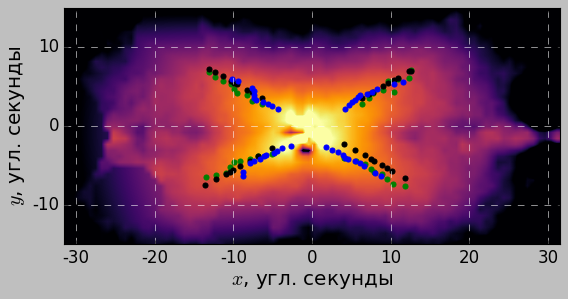

In [14]:
my_cmap = copy.copy(matplotlib.cm.get_cmap('inferno'))  # copy the default cmap
my_cmap.set_bad((0, 0, 0))
matplotlib.rcParams.update({'font.size': 18})
vmin = 10 ** (-1)
vmax = 1.6
image_file = "x_only.fits"

image_data = fits.getdata(image_file, ext=0)
cut_x_left = 35
cut_x_right = 122
cut_y_bottom = 10
cut_y_up = 40 
plt.figure()
#plt.imshow(image_data[cut_y_bottom:cut_y_up, cut_x_left:cut_x_right], cmap=my_cmap, vmin=vmin, vmax=vmax, origin="lower", norm=LogNorm())
plt.imshow(image_data[:, cut_x_left:cut_x_right], 
           cmap=my_cmap, vmin=vmin, vmax=vmax, origin="lower", norm=LogNorm())

plt.grid(color='w', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
dir_list = ["e04", "e06"]#, "e08"]
ell = [0.4, 0.6]#, 0.8]
axis_ratio = np.ones(len(ell)) - ell

signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
colors = ['g', 'b', 'purple']
x0 = 79.6000 - cut_x_left
y0 = 25.2 #- cut_y_bottom
k_ideal = 0.581458 
ang = 1
j = 1
for j in range(0,2):
    dir = dir_list[j]
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    
    data_angles[:, 1:] = np.tan(data_angles[:, 1:]*np.pi/180)
    #print (data_angles)
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j]**2)
        y = data_angles[:,i]*x
        if j == 0:
            x_ideal = np.copy(x)
            y_ideal = x_ideal*k_ideal
        
        #print (axis_ratio[j],np.shape(x_ideal), np.shape(y_ideal))
        #print (np.shape(x_ideal), np.shape(y_ideal))
        x, y = rotate_via_numpy(x, y, np.pi/180.0*ang)
        if j == 0:
            x_ideal, y_ideal = rotate_via_numpy(x_ideal, y_ideal, np.pi/180.0*ang)
            x_ideal = x0 + signs_xy[i-1][0]*x_ideal
            y_ideal = y0 + signs_xy[i-1][1]*y_ideal
            
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y    
        plt.scatter(x, y, color=colors[j])
        if j == 0:
            plt.scatter(x_ideal, y_ideal, color="k")
    j += 1

plt.plot()
desired_ticks = [-30, -20,-10, 0, 10, 20,30]
desired_ticks_labels = list(map(str, desired_ticks))
x_ticks = (x0+np.array(desired_ticks)/0.75)

desired_ticks_y = [-10, 0, 10]
desired_ticks_labels_y = list(map(str, desired_ticks_y))
y_ticks = (y0+np.array(desired_ticks_y)/0.75)
plt.xticks(np.array(x_ticks), desired_ticks_labels)
plt.yticks(np.array(y_ticks), desired_ticks_labels_y)
plt.xlabel("$x$, угл. секунды")#, fontsize=14)
plt.ylabel("$y$, угл. секунды")#, fontsize=14)
plt.gca().set_aspect("equal")
plt.xlim([-42+x0, 42+x0])
plt.ylim([-20+y0, 20+y0])
plt.savefig("Comp_with_Sav.jpg",
                transparent = False, dpi=300, bbox_inches='tight', pad_inches=0.05)

[[10.6   25.048 25.259 36.204 45.382 32.973  8.466]
 [12.5   27.119 23.903 29.829 39.956 30.202  6.01 ]
 [14.1   29.268 26.482 28.827 36.842 30.355  3.892]
 [15.9   27.996 25.03  27.368 36.807 29.3    4.473]
 [16.9   23.376 26.401 25.716 37.356 28.212  5.397]
 [18.2   31.166 28.315 27.615 35.26  30.589  3.007]
 [19.8   29.623 27.739 29.61  36.111 30.77   3.177]
 [21.6   27.413 27.669 28.412 36.908 30.101  3.948]
 [23.3   30.573 28.646 26.619 33.837 29.919  2.659]]
[[ 9.4   28.643 27.94  44.753 57.02  39.589 12.104]
 [10.9   30.287 26.753 38.062 51.319 36.605  9.429]
 [12.2   31.564 27.507 35.914 45.929 35.229  6.856]
 [13.4   32.237 27.514 36.921 43.91  35.145  6.055]
 [14.8   33.22  25.882 33.618 45.165 34.471  6.9  ]
 [15.5   33.369 26.576 33.617 43.614 34.294  6.078]
 [16.8   31.693 29.358 33.275 40.518 33.711  4.17 ]
 [18.    30.936 32.089 32.093 38.892 33.503  3.147]
 [19.3   30.345 33.    32.276 38.188 33.452  2.901]
 [23.1   28.172 31.945 34.974 37.947 33.26   3.623]
 [24.5   26

OSError: e08/angles.dat not found.

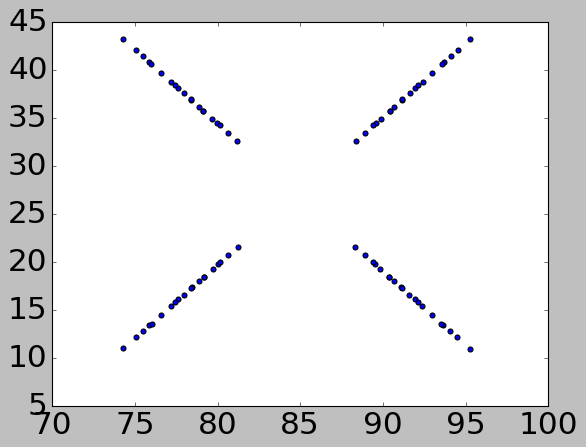

In [4]:
dir_list = ["e04", "e06", "e08"]
ell = [0.4, 0.6, 0.8]
axis_ratio = np.ones(len(ell)) - ell
j = 0
signs_xy = ((1,1),(-1,1),(-1,-1),(1,-1),)
x0 = 84.7828
y0 = 27.0606
for dir in dir_list:
    
    data_angles = np.loadtxt(dir + "/" + "angles.dat")
    print (data_angles)
    data_angles[:, 1:] = np.arctan(data_angles[:, 1:])
    for i in range (1,5):
        x = data_angles[:,0]/np.sqrt(1 + data_angles[:,i]**2/axis_ratio[j])
        y = data_angles[:,i]*x
        x = x0 + signs_xy[i-1][0]*x
        y = y0 + signs_xy[i-1][1]*y
        plt.scatter(x, y)
    j += 1

In [5]:
plt.savefig(sys.argv[2] + "_model.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>